In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import ADASYN
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from xgboost import XGBClassifier
from sklearn.inspection import permutation_importance
from sklearn.model_selection import GridSearchCV


In [ ]:
stroke_prediction_dataset = pd.read_csv("/content/dataset.csv")

print(stroke_prediction_dataset.head())
print(stroke_prediction_dataset.tail())

print(stroke_prediction_dataset.columns)
print(stroke_prediction_dataset.dtypes)
print(f"Dataset dimensions → Rows: {stroke_prediction_dataset.shape[0]}, Columns: {stroke_prediction_dataset.shape[1]}")

print(stroke_prediction_dataset.describe())

print("Missing values per column:")
print(stroke_prediction_dataset.isnull().sum())

print(f"Total duplicate records: {stroke_prediction_dataset.duplicated().sum()}")

print(stroke_prediction_dataset.info())


      id  gender   age  hypertension  heart_disease ever_married  \
0  30669    Male   3.0             0              0           No   
1  30468    Male  58.0             1              0          Yes   
2  16523  Female   8.0             0              0           No   
3  56543  Female  70.0             0              0          Yes   
4  46136    Male  14.0             0              0           No   

      work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0      children          Rural              95.12  18.0              NaN   
1       Private          Urban              87.96  39.2     never smoked   
2       Private          Urban             110.89  17.6              NaN   
3       Private          Rural              69.04  35.9  formerly smoked   
4  Never_worked          Rural             161.28  19.1              NaN   

   stroke  
0       0  
1       0  
2       0  
3       0  
4       0  
          id  gender   age  hypertension  heart_disease ever_m

# Stroke value counts

In [ ]:
print(stroke_prediction_dataset.stroke.value_counts())

stroke
0    42617
1      783
Name: count, dtype: int64


#Check Missing Values

In [ ]:
missing_values=stroke_prediction_dataset.isnull().sum()
print(missing_values)

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64


#Handling Missing Values

In [ ]:
pd.options.mode.chained_assignment = None

stroke_prediction_dataset['bmi'].fillna(stroke_prediction_dataset['bmi'].mean(), inplace=True)

cleaned_missing_value_handled_id_dropped_smoking_status_dropna_stroke_df = stroke_prediction_dataset.dropna(subset=['smoking_status'])
cleaned_missing_value_handled_id_dropped_smoking_status_dropna_stroke_df = cleaned_missing_value_handled_id_dropped_smoking_status_dropna_stroke_df.drop(columns=['id'])

print(cleaned_missing_value_handled_id_dropped_smoking_status_dropna_stroke_df.isnull().sum())
print(f"Dataset shape after handling missing values → {cleaned_missing_value_handled_id_dropped_smoking_status_dropna_stroke_df.shape}")

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64
Dataset shape after handling missing values → (30108, 11)


<ipython-input-59-da0722ef7008>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  stroke_prediction_dataset['bmi'].fillna(stroke_prediction_dataset['bmi'].mean(), inplace=True)


In [ ]:
cleaned_missing_value_handled_id_dropped_smoking_status_dropna_stroke_df.to_csv('cleaned_missing_value_handled_id_dropped_smoking_status_dropna_stroke_df.csv',index=False)

# Changing Category to Numerical Values

In [ ]:
features = ['smoking_status', 'gender', 'ever_married', 'Residence_type', 'gender', 'work_type']
for col in features:
    values = cleaned_missing_value_handled_id_dropped_smoking_status_dropna_stroke_df[col].unique()
    print(f"Distinct entries found in '{col}' column → {values}")

Distinct entries found in 'smoking_status' column → ['never smoked' 'formerly smoked' 'smokes']
Distinct entries found in 'gender' column → ['Male' 'Female' 'Other']
Distinct entries found in 'ever_married' column → ['Yes' 'No']
Distinct entries found in 'Residence_type' column → ['Urban' 'Rural']
Distinct entries found in 'gender' column → ['Male' 'Female' 'Other']
Distinct entries found in 'work_type' column → ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']


In [ ]:
def label_encoder(df_x):
    categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

    encoders = {}
    for col in categorical_cols:
        encoders[col] = LabelEncoder()

    for col in categorical_cols:
        df_x[col] = encoders[col].fit_transform(df_x[col])

    return df_x

cleaned_missing_value_handled_id_dropped_smoking_status_dropna_stroke_df=label_encoder(cleaned_missing_value_handled_id_dropped_smoking_status_dropna_stroke_df)
cleaned_missing_value_handled_id_dropped_smoking_status_dropna_stroke_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,1,58.0,1,0,1,2,1,87.96,39.2,1,0
3,0,70.0,0,0,1,2,0,69.04,35.9,0,0
6,0,52.0,0,0,1,2,1,77.59,17.7,0,0
7,0,75.0,0,1,1,3,0,243.53,27.0,1,0
8,0,32.0,0,0,1,2,0,77.67,32.3,2,0


In [ ]:
cleaned_missing_value_handled_id_dropped_smoking_status_dropna_stroke_df.to_csv('cleaned_missing_value_handled_id_dropped_smoking_status_dropna_stroke_df_encoded.csv',index=False)

# Building Model

stroke
0    29470
1      638
Name: count, dtype: int64


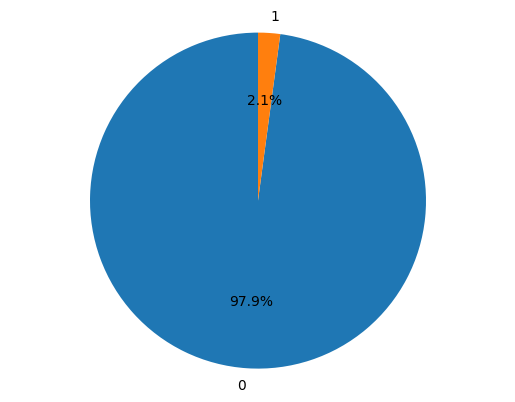

In [ ]:
class_distribution=cleaned_missing_value_handled_id_dropped_smoking_status_dropna_stroke_df['stroke'].value_counts()
print(class_distribution)
fig,ax=plt.subplots()
ax.pie(class_distribution,labels=class_distribution.index,autopct='%1.1f%%',startangle=90)
ax.axis('equal')
plt.show()



## Split the Data, Balance the Dataset, Model Training and Prediction

In [ ]:
X = cleaned_missing_value_handled_id_dropped_smoking_status_dropna_stroke_df.drop('stroke', axis=1)
y = cleaned_missing_value_handled_id_dropped_smoking_status_dropna_stroke_df['stroke']
print(y.value_counts())
print(X.shape)
print(y.shape)

stroke
0    29470
1      638
Name: count, dtype: int64
(30108, 10)
(30108,)


In [ ]:

def split_train_valid_test(X, y, ts, rs):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ts, random_state=rs, stratify=y)
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=ts, random_state=rs, stratify=y_train)
    return X_train, X_valid, X_test, y_train, y_valid, y_test


X_train, X_valid, X_test, y_train, y_valid, y_test = split_train_valid_test(X, y, 0.2, 42)

# Resample only the training set
adasyn = ADASYN(random_state=42, sampling_strategy='minority')
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

# Check class distributions
_, train_count = np.unique(y_train_resampled, return_counts=True)
_, valid_count = np.unique(y_valid, return_counts=True)
_, test_count = np.unique(y_test, return_counts=True)
print("Resampled Training Set Counts:", train_count)
print("Validation Set Counts:", valid_count)
print("Test Set Counts:", test_count)

Resampled Training Set Counts: [18860 18912]
Validation Set Counts: [4716  102]
Test Set Counts: [5894  128]


In [ ]:
adasyn=ADASYN(random_state=42,sampling_strategy='minority')
X_resampled,y_resampled=adasyn.fit_resample(cleaned_missing_value_handled_id_dropped_smoking_status_dropna_stroke_df.drop('stroke',axis=1),cleaned_missing_value_handled_id_dropped_smoking_status_dropna_stroke_df['stroke'])
print(y_resampled.value_counts())
print(X_resampled.shape)
print(y_resampled.shape)

stroke
1    29512
0    29470
Name: count, dtype: int64
(58982, 10)
(58982,)


(np.float64(-1.1000000014560682),
 np.float64(1.1000000305918392),
 np.float64(-1.0999999999945462),
 np.float64(1.0999999999997403))

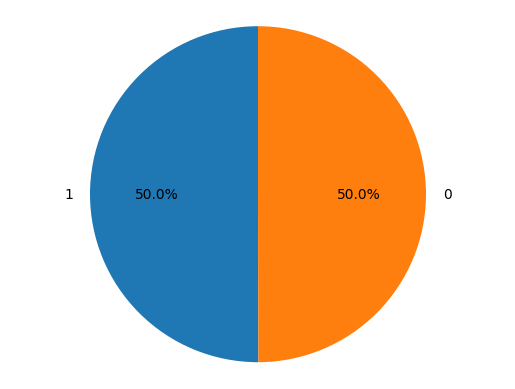

In [ ]:
_class_distribution_of_stroke_df_after_applying_adasyn=y_resampled.value_counts()
fig,ax=plt.subplots()
ax.pie(_class_distribution_of_stroke_df_after_applying_adasyn,labels=_class_distribution_of_stroke_df_after_applying_adasyn.index,autopct='%1.1f%%',startangle=90)
ax.axis('equal')

#Data Normalisation

In [ ]:
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

#Model Training

#### Random Forest (RF)

Here’s how Random Forest did on the original test set:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      5894
           1       0.03      0.05      0.04       128

    accuracy                           0.94      6022
   macro avg       0.50      0.51      0.50      6022
weighted avg       0.96      0.94      0.95      6022

Confusion Matrix for Random Forest (actual vs predicted):
[[5671  223]
 [ 121    7]]


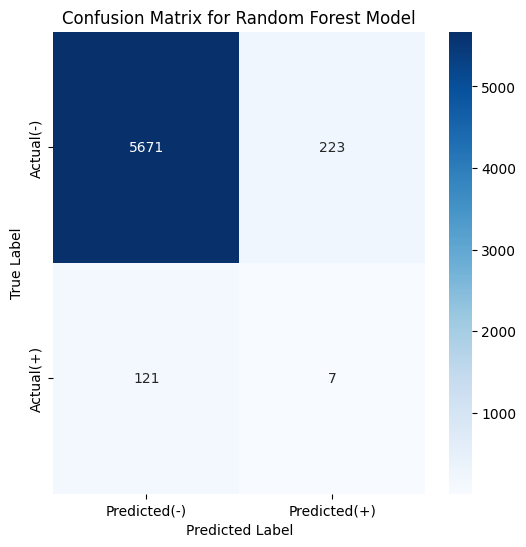

Random Forest Accuracy: 0.94
Random Forest Precision: 0.03
Random Forest Recall: 0.05
Random Forest F1 Score: 0.04
Random Forest Sensitivity: 0.05
Random Forest Specificity: 0.96
Random Forest AUC: 0.72


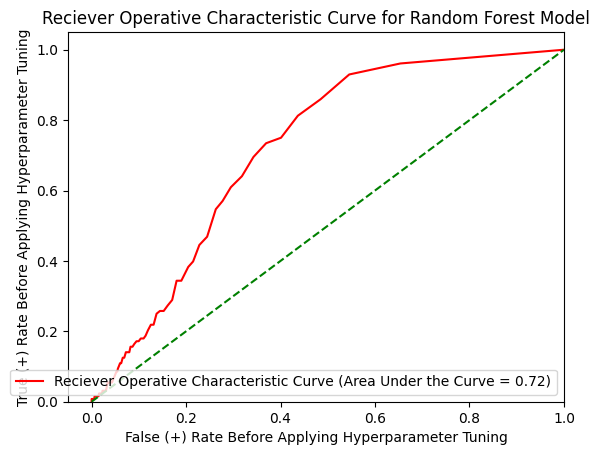

In [ ]:
# Build and evaluate a Random Forest model, with a confusion matrix plot


# Define sensitivity/specificity function
def calc_sens_spec(y_true, y_pred):
    cnf_mtrx_for_models = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cnf_mtrx_for_models.ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    return sensitivity, specificity

# Create and train a Random Forest model
rf_classifier_model_before_hyperparameter_tuning = RandomForestClassifier(random_state=42)
rf_classifier_model_before_hyperparameter_tuning.fit(X_train_resampled, y_train_resampled)

# Make predictions on the original test set
y_prediction_before_hyperparameter_tuning = rf_classifier_model_before_hyperparameter_tuning.predict(X_test)
y_prediction_before_hyperparameter_tuning_prob = rf_classifier_model_before_hyperparameter_tuning.predict_proba(X_test)

print("Here’s how Random Forest did on the original test set:")
print(classification_report(y_test, y_prediction_before_hyperparameter_tuning))

print("Confusion Matrix for Random Forest (actual vs predicted):")
print(confusion_matrix(y_test, y_prediction_before_hyperparameter_tuning))

cnf_mtrx_for_rf_clsfr = confusion_matrix(y_test, y_prediction_before_hyperparameter_tuning)
plt.figure(figsize=(6, 6))
sns.heatmap(cnf_mtrx_for_rf_clsfr, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted(-)', 'Predicted(+)'],
            yticklabels=['Actual(-)', 'Actual(+)'])
plt.title('Confusion Matrix for Random Forest Model')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Calculate accuracy
acc_rf_model_before_tuning = accuracy_score(y_test, y_prediction_before_hyperparameter_tuning)
print(f"Random Forest Accuracy: {acc_rf_model_before_tuning:.2f}")

# Get precision, recall, and F1 score
rf_precision_before_tuning = precision_score(y_test, y_prediction_before_hyperparameter_tuning)
rf_recall_before_tuning = recall_score(y_test, y_prediction_before_hyperparameter_tuning)
rf_f1_before_tuning = f1_score(y_test, y_prediction_before_hyperparameter_tuning)
print(f"Random Forest Precision: {rf_precision_before_tuning:.2f}")
print(f"Random Forest Recall: {rf_recall_before_tuning:.2f}")
print(f"Random Forest F1 Score: {rf_f1_before_tuning:.2f}")

# Calculate sensitivity, specificity, and AUC
sensitivity_rf, specificity_rf = calc_sens_spec(y_test, y_prediction_before_hyperparameter_tuning)
false_pos, true_pos, _ = roc_curve(y_test, y_prediction_before_hyperparameter_tuning_prob[:, 1])
rf_model_area_under_curve_score_before_tuning = roc_auc_score(y_test, y_prediction_before_hyperparameter_tuning_prob[:, 1])
print(f"Random Forest Sensitivity: {sensitivity_rf:.2f}")
print(f"Random Forest Specificity: {specificity_rf:.2f}")
print(f"Random Forest AUC: {rf_model_area_under_curve_score_before_tuning:.2f}")

# Plot the ROC curve to see how well it separates classes
plt.figure()
plt.plot(false_pos, true_pos, color='red', label=f'Reciever Operative Characteristic Curve (Area Under the Curve = {rf_model_area_under_curve_score_before_tuning:.2f})')
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.title('Reciever Operative Characteristic Curve for Random Forest Model')
plt.legend(loc="lower right")

plt.xlim([-0.05, 1.0])
plt.xlabel('False (+) Rate Before Applying Hyperparameter Tuning')

plt.ylim([0.0, 1.05])
plt.ylabel('True (+) Rate Before Applying Hyperparameter Tuning')

plt.show()

### XGBoost (XGB)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:51:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Here’s how XGBoost did on the original test set:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97      5894
           1       0.04      0.09      0.06       128

    accuracy                           0.94      6022
   macro avg       0.51      0.52      0.51      6022
weighted avg       0.96      0.94      0.95      6022

Confusion Matrix for XGBoost (actual vs predicted):
[[5624  270]
 [ 116   12]]


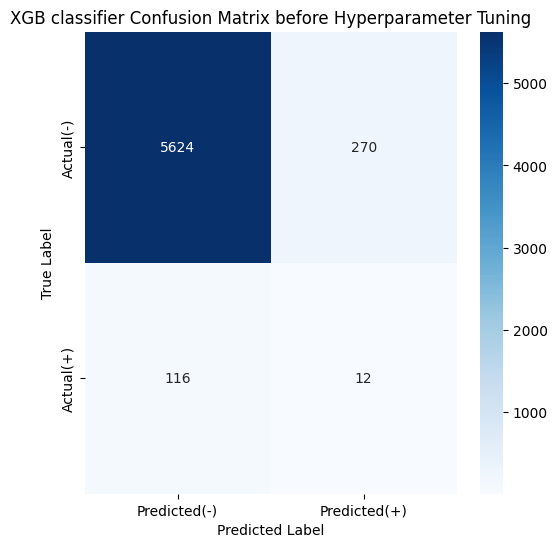

XGBoost Accuracy: 0.94
XGBoost Precision: 0.04
XGBoost Recall: 0.09
XGBoost F1 Score: 0.06
Sensitivity of xgb classifier model before tuning: 0.09
Specificity of xgb classifier model before tuning: 0.95
AUC of xgb classifier model before tuning: 0.71


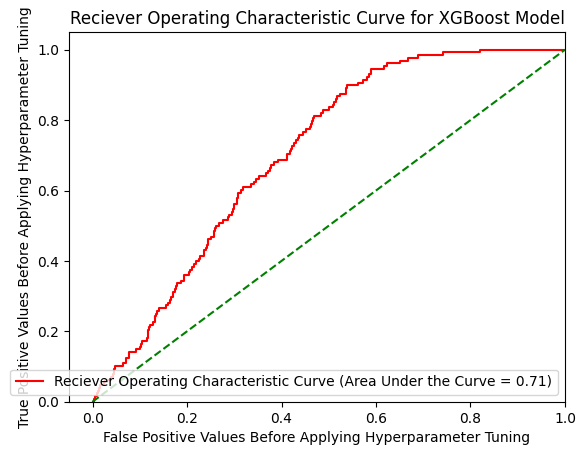

In [ ]:


# Create and train an XGBoost model
xgb_classifier_model_before_applying_hyperparameter_tuning = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_classifier_model_before_applying_hyperparameter_tuning.fit(X_train_resampled, y_train_resampled)  # Use resampled training data

y_predictions_before_tuning = xgb_classifier_model_before_applying_hyperparameter_tuning.predict(X_test)  # Predicted labels
xgb_classifier_prediction_probability_before_tuning = xgb_classifier_model_before_applying_hyperparameter_tuning.predict_proba(X_test)  # Probabilities for Reciever Operating Charecteristic/Area Under the Curve

# Check how well the model did
print("Here’s how XGBoost did on the original test set:")
print(classification_report(y_test, y_predictions_before_tuning))

# Look at the confusion matrix (numerical version)
print("Confusion Matrix for XGBoost (actual vs predicted):")
print(confusion_matrix(y_test, y_predictions_before_tuning))

cnf_mtrx_for_xgb_clsfr = confusion_matrix(y_test, y_predictions_before_tuning)
plt.figure(figsize=(6, 6))
sns.heatmap(cnf_mtrx_for_xgb_clsfr, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted(-)', 'Predicted(+)'],
            yticklabels=['Actual(-)', 'Actual(+)'])
plt.title('XGB classifier Confusion Matrix before Hyperparameter Tuning')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Calculate accuracy
accracy_score_before_applying_hyperparamter_tuning = accuracy_score(y_test, y_predictions_before_tuning)
print(f"XGBoost Accuracy: {accracy_score_before_applying_hyperparamter_tuning:.2f}")

# Get precision, recall, and F1 score
precision_values_of_xgb_model_before_tuning = precision_score(y_test, y_predictions_before_tuning)  # How many predicted positives were correct?
recall_values_of_xgb_model_before_tuning = recall_score(y_test, y_predictions_before_tuning)        # How many actual positives did we find?
f1_values_of_xgb_classifier_before_tuning = f1_score(y_test, y_predictions_before_tuning)                # A balance between precision and recall
print(f"XGBoost Precision: {precision_values_of_xgb_model_before_tuning:.2f}")
print(f"XGBoost Recall: {recall_values_of_xgb_model_before_tuning:.2f}")
print(f"XGBoost F1 Score: {f1_values_of_xgb_classifier_before_tuning:.2f}")

# Calculate sensitivity, specificity, and AUC
sensitivity_xgb, specificity_xgb = calc_sens_spec(y_test, y_predictions_before_tuning)
false_positive_values_before_tuning, true_positive_before_tuning, _ = roc_curve(y_test, xgb_classifier_prediction_probability_before_tuning[:, 1])
area_under_curve_for_xgb_before_tuning = roc_auc_score(y_test, xgb_classifier_prediction_probability_before_tuning[:, 1])
print(f"Sensitivity of xgb classifier model before tuning: {sensitivity_xgb:.2f}")
print(f"Specificity of xgb classifier model before tuning: {specificity_xgb:.2f}")
print(f"AUC of xgb classifier model before tuning: {area_under_curve_for_xgb_before_tuning:.2f}")

# Plot the ROC curve to see how well it separates classes
plt.figure()
plt.plot(false_positive_values_before_tuning, true_positive_before_tuning, color='red', label=f'Reciever Operating Characteristic Curve (Area Under the Curve = {area_under_curve_for_xgb_before_tuning:.2f})')
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.title('Reciever Operating Characteristic Curve for XGBoost Model')
plt.legend(loc="lower right")
plt.xlim([-0.05, 1.0])
plt.xlabel('False Positive Values Before Applying Hyperparameter Tuning')

plt.ylim([0.0, 1.05])

plt.ylabel('True Positive Values Before Applying Hyperparameter Tuning')

plt.show()

## Performance Benchmark Across Models


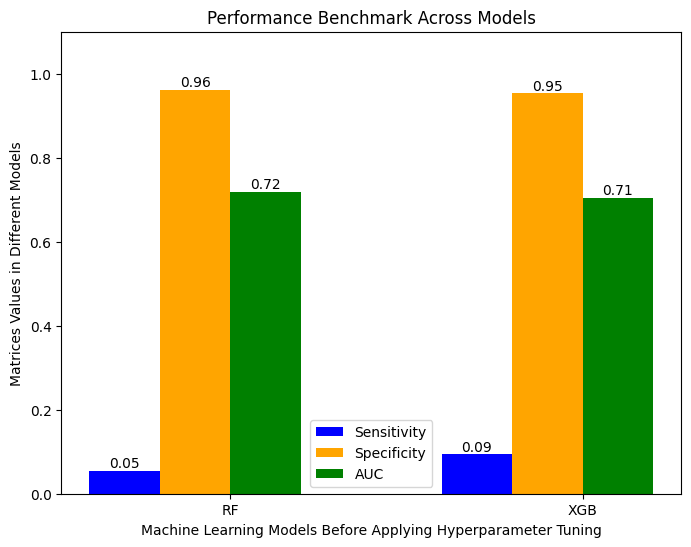

In [ ]:
#8
# Performance Benchmark Across Models


# Use actual values from #6 and #7
ml_names = ['RF', 'XGB']
sensitivities = [sensitivity_rf, sensitivity_xgb]  # From #6 and #7
specificities = [specificity_rf, specificity_xgb]  # From #6 and #7
aucs = [rf_model_area_under_curve_score_before_tuning, area_under_curve_for_xgb_before_tuning]                           # From #6 and #7

# Define the autolabel function to show the height (score) above each bar
def autolabel(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2.0, yval, round(yval, 2),
                 ha='center', va='bottom')

# Plot sensitivity, specificity, and AUC
fig, ax = plt.subplots(figsize=(8, 6))
bar_width = 0.2
index = np.arange(len(ml_names))

# Create bars
bar1 = ax.bar(index, sensitivities, bar_width, label='Sensitivity', color='blue')
bar2 = ax.bar(index + bar_width, specificities, bar_width, label='Specificity', color='orange')
bar3 = ax.bar(index + 2 * bar_width, aucs, bar_width, label='AUC', color='green')

# Customize the plot
ax.set_xlabel('Machine Learning Models Before Applying Hyperparameter Tuning')
ax.set_ylabel('Matrices Values in Different Models')
ax.set_title('Performance Benchmark Across Models')
ax.set_xticks(index + bar_width * 1.5)  # Center x-ticks properly
ax.set_xticklabels(ml_names)
ax.set_ylim(0, 1.1)  # Ensure space for labels above bars
ax.legend()

# Add labels above the bars
autolabel(bar1)
autolabel(bar2)
autolabel(bar3)

plt.show()

### Tree-Based Feature Importance

Random Forest Feature Ranking:
age: 0.4130
avg_glucose_level: 0.2057
bmi: 0.1445
smoking_status: 0.0582
work_type: 0.0504
Residence_type: 0.0491
gender: 0.0330
ever_married: 0.0185
hypertension: 0.0176
heart_disease: 0.0100


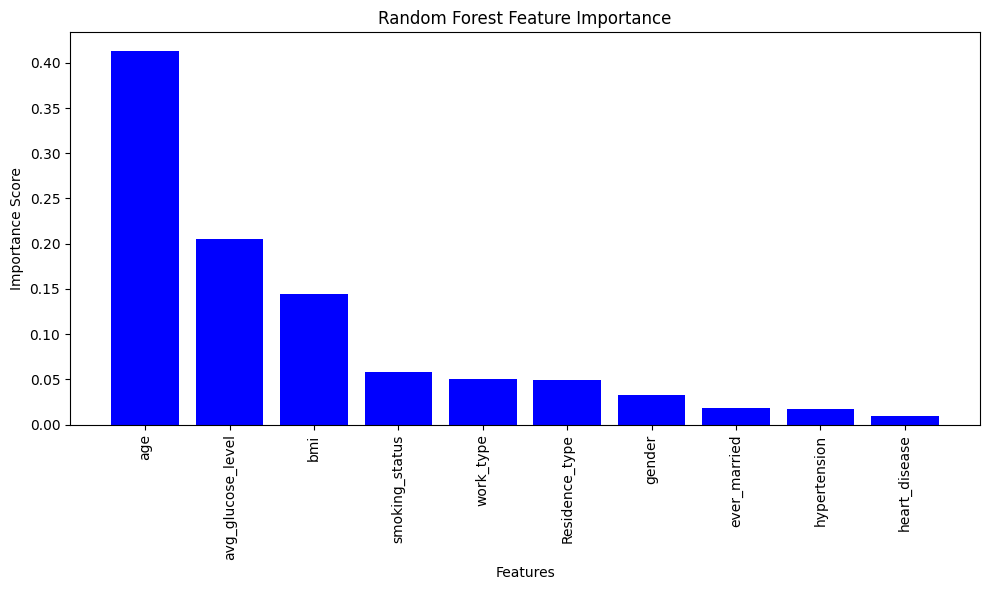

XGBoost Feature Ranking:
age: 0.1736
Residence_type: 0.1526
work_type: 0.1274
gender: 0.1221
heart_disease: 0.0895
ever_married: 0.0866
smoking_status: 0.0848
hypertension: 0.0729
avg_glucose_level: 0.0471
bmi: 0.0435


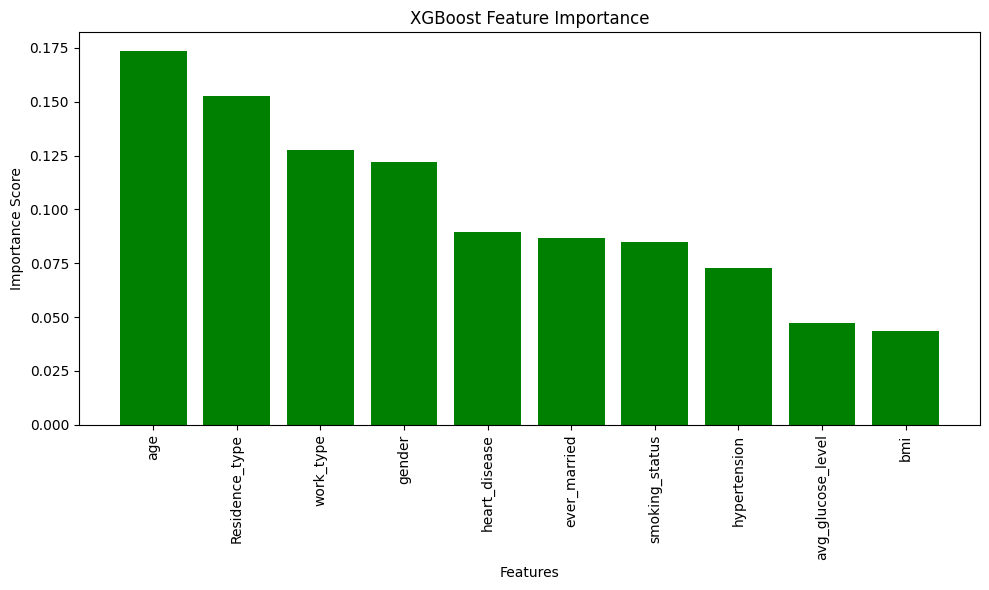

In [ ]:
#9
# Tree-Based Feature Importance for Random Forest and XGBoost


features_from_stroke_dataset_drop_target_stroke = cleaned_missing_value_handled_id_dropped_smoking_status_dropna_stroke_df.drop('stroke', axis=1).columns

# Random Forest Feature Importance
important_features_for_random_forest_classifier = rf_classifier_model_before_hyperparameter_tuning.feature_importances_
rf_indices = np.argsort(important_features_for_random_forest_classifier)[::-1]
print("Random Forest Feature Ranking:")
for i in rf_indices:
    print(f"{features_from_stroke_dataset_drop_target_stroke[i]}: {important_features_for_random_forest_classifier[i]:.4f}")

# Plot RF feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(important_features_for_random_forest_classifier)), important_features_for_random_forest_classifier[rf_indices], color='blue')
plt.xticks(range(len(important_features_for_random_forest_classifier)), [features_from_stroke_dataset_drop_target_stroke[i] for i in rf_indices], rotation=90)
plt.title('Random Forest Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.tight_layout()
plt.show()

# XGBoost Feature Importance
important_features_for_xgb_classifier_model = xgb_classifier_model_before_applying_hyperparameter_tuning.feature_importances_
xgb_indices = np.argsort(important_features_for_xgb_classifier_model)[::-1]
print("XGBoost Feature Ranking:")
for i in xgb_indices:
    print(f"{features_from_stroke_dataset_drop_target_stroke[i]}: {important_features_for_xgb_classifier_model[i]:.4f}")

# Plot XGB feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(important_features_for_xgb_classifier_model)), important_features_for_xgb_classifier_model[xgb_indices], color='green')
plt.xticks(range(len(important_features_for_xgb_classifier_model)), [features_from_stroke_dataset_drop_target_stroke[i] for i in xgb_indices], rotation=90)
plt.title('XGBoost Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.tight_layout()
plt.show()

### Permutation-Based Feature Importance

Random Forest Permutation Importance:
age: 0.2064 ± 0.0222
avg_glucose_level: 0.0214 ± 0.0069
bmi: 0.0037 ± 0.0106
gender: -0.0010 ± 0.0045
ever_married: -0.0028 ± 0.0045
heart_disease: -0.0051 ± 0.0032
Residence_type: -0.0074 ± 0.0088
hypertension: -0.0110 ± 0.0038
smoking_status: -0.0136 ± 0.0068
work_type: -0.0171 ± 0.0047


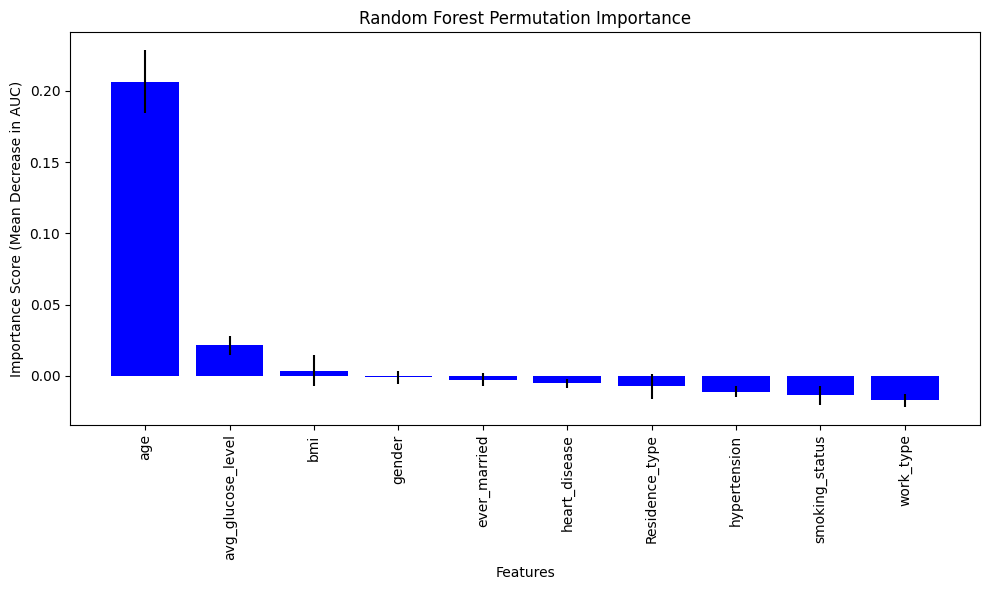

XGBoost Permutation Importance:
age: 0.2304 ± 0.0184
bmi: 0.0285 ± 0.0093
avg_glucose_level: 0.0216 ± 0.0087
smoking_status: 0.0103 ± 0.0041
gender: 0.0052 ± 0.0028
Residence_type: -0.0025 ± 0.0050
ever_married: -0.0027 ± 0.0027
work_type: -0.0091 ± 0.0056
hypertension: -0.0106 ± 0.0033
heart_disease: -0.0204 ± 0.0043


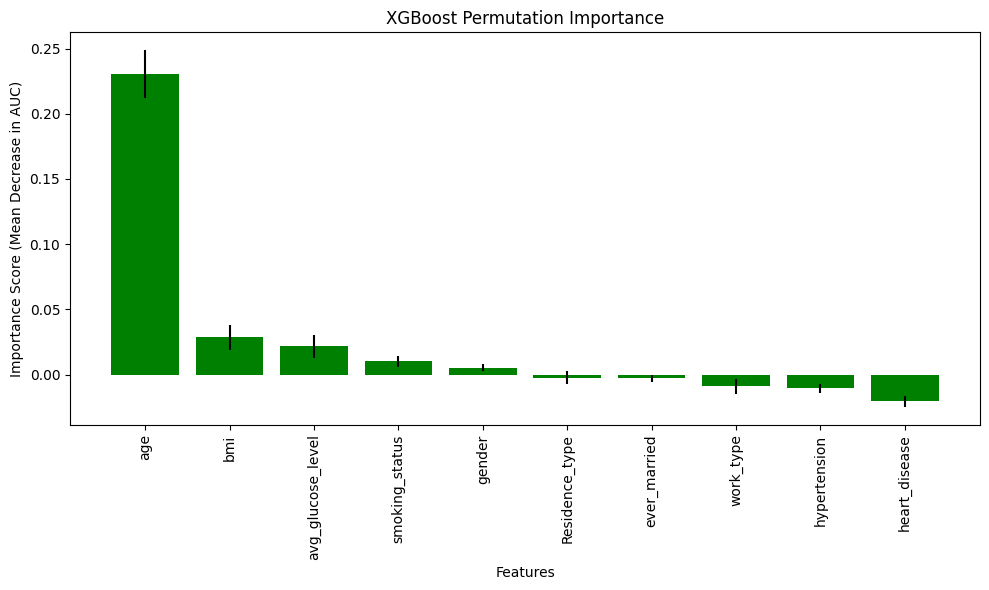

In [ ]:

# Random Forest Permutation Importance
important_features_based_on_permutation_for_rf_classifier = permutation_importance(rf_classifier_model_before_hyperparameter_tuning, X_test, y_test, n_repeats=10, random_state=42, scoring='roc_auc')
rf_perm_indices = np.argsort(important_features_based_on_permutation_for_rf_classifier.importances_mean)[::-1]
print("Random Forest Permutation Importance:")
for i in rf_perm_indices:
    print(f"{features_from_stroke_dataset_drop_target_stroke[i]}: {important_features_based_on_permutation_for_rf_classifier.importances_mean[i]:.4f} ± {important_features_based_on_permutation_for_rf_classifier.importances_std[i]:.4f}")

# Plot RF permutation importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(important_features_based_on_permutation_for_rf_classifier.importances_mean)), important_features_based_on_permutation_for_rf_classifier.importances_mean[rf_perm_indices],
        yerr=important_features_based_on_permutation_for_rf_classifier.importances_std[rf_perm_indices], color='blue')
plt.xticks(range(len(important_features_based_on_permutation_for_rf_classifier.importances_mean)), [features_from_stroke_dataset_drop_target_stroke[i] for i in rf_perm_indices], rotation=90)
plt.title('Random Forest Permutation Importance')
plt.xlabel('Features')
plt.ylabel('Importance Score (Mean Decrease in AUC)')
plt.tight_layout()
plt.show()

# XGBoost Permutation Importance
important_features_based_on_permutation_for_xgb_classifier = permutation_importance(xgb_classifier_model_before_applying_hyperparameter_tuning, X_test, y_test, n_repeats=10, random_state=42, scoring='roc_auc')
xgb_perm_indices = np.argsort(important_features_based_on_permutation_for_xgb_classifier.importances_mean)[::-1]
print("XGBoost Permutation Importance:")
for i in xgb_perm_indices:
    print(f"{features_from_stroke_dataset_drop_target_stroke[i]}: {important_features_based_on_permutation_for_xgb_classifier.importances_mean[i]:.4f} ± {important_features_based_on_permutation_for_xgb_classifier.importances_std[i]:.4f}")

# Plot XGB permutation importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(important_features_based_on_permutation_for_xgb_classifier.importances_mean)), important_features_based_on_permutation_for_xgb_classifier.importances_mean[xgb_perm_indices],
        yerr=important_features_based_on_permutation_for_xgb_classifier.importances_std[xgb_perm_indices], color='green')
plt.xticks(range(len(important_features_based_on_permutation_for_xgb_classifier.importances_mean)), [features_from_stroke_dataset_drop_target_stroke[i] for i in xgb_perm_indices], rotation=90)
plt.title('XGBoost Permutation Importance')
plt.xlabel('Features')
plt.ylabel('Importance Score (Mean Decrease in AUC)')
plt.tight_layout()
plt.show()

## Hyperparameter Tuning

In [ ]:
#12
# Hyperparameter Tuning for Random Forest and XGBoost


# --- Random Forest Hyperparameter Tuning ---
# Define parameter grid for Random Forest
possible_parameters_for_rf_classifier = {
    'n_estimators': [100, 200, 300],        # Number of trees
    'max_depth': [10, 20, None],            # Maximum depth of trees
    'min_samples_split': [2, 5, 10],        # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4]           # Minimum samples at a leaf node
}

# Initialize Random Forest model
rf_classifier_initialization = RandomForestClassifier(random_state=42)

# Perform Grid Search with 5-fold cross-validation
search_best_parameters_for_rf_classifier = GridSearchCV(
    estimator=rf_classifier_initialization,
    param_grid=possible_parameters_for_rf_classifier,
    cv=5,                                   # 5-fold cross-validation
    scoring='roc_auc',                      # Optimize for AUC
    n_jobs=-1,                              # Use all available CPU cores
    verbose=1
)

# Fit Grid Search on resampled training data
search_best_parameters_for_rf_classifier.fit(X_train_resampled, y_train_resampled)

# Best parameters and score
print("Best Random Forest Parameters:", search_best_parameters_for_rf_classifier.best_params_)
print("Best Random Forest CV AUC:", search_best_parameters_for_rf_classifier.best_score_)

rf_model_optimized = search_best_parameters_for_rf_classifier.best_estimator_
rf_y_pred = rf_model_optimized.predict(X_test)
rf_y_pred_proba = rf_model_optimized.predict_proba(X_test)[:, 1]
rf_test_auc = roc_auc_score(y_test, rf_y_pred_proba)
print("Optimized Random Forest Test AUC:", rf_test_auc)

# --- XGBoost Hyperparameter Tuning ---
# Define parameter grid for XGBoost
possible_parameters_for_xgb_classifier = {
    'n_estimators': [100, 200, 300],        # Number of boosting rounds
    'max_depth': [3, 6, 9],                 # Maximum depth of trees
    'learning_rate': [0.01, 0.1, 0.3],      # Step size shrinkage
    'subsample': [0.7, 0.8, 1.0]           # Fraction of samples used per tree
}

# Initialize XGBoost model
initialize_xgb_classifier_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Perform Grid Search with 5-fold cross-validation
search_for_best_parameters_for_xgb_classifier_using_gridsearchcv = GridSearchCV(
    estimator=initialize_xgb_classifier_model,
    param_grid=possible_parameters_for_xgb_classifier,
    cv=5,                                   # 5-fold cross-validation
    scoring='roc_auc',                      # Optimize for AUC
    n_jobs=-1,                              # Use all available CPU cores
    verbose=1
)

# Fit Grid Search on resampled training data
search_for_best_parameters_for_xgb_classifier_using_gridsearchcv.fit(X_train_resampled, y_train_resampled)

# Best parameters and score
print("Best XGBoost Parameters:", search_for_best_parameters_for_xgb_classifier_using_gridsearchcv.best_params_)
print("Best XGBoost CV AUC:", search_for_best_parameters_for_xgb_classifier_using_gridsearchcv.best_score_)

# Update xgb_model with best parameters and evaluate on test set
xgb_model_optimized = search_for_best_parameters_for_xgb_classifier_using_gridsearchcv.best_estimator_
xgb_y_pred = xgb_model_optimized.predict(X_test)
xgb_y_pred_proba = xgb_model_optimized.predict_proba(X_test)[:, 1]
xgb_test_auc = roc_auc_score(y_test, xgb_y_pred_proba)
print("Optimized XGBoost Test AUC:", xgb_test_auc)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Random Forest Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Random Forest CV AUC: 0.9745848916723816
Optimized Random Forest Test AUC: 0.7219325267220902
Fitting 5 folds for each of 81 candidates, totalling 405 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:32:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best XGBoost Parameters: {'learning_rate': 0.3, 'max_depth': 9, 'n_estimators': 300, 'subsample': 0.8}
Best XGBoost CV AUC: 0.9876925356502065
Optimized XGBoost Test AUC: 0.7013156918052257


##Hypertuned Randomforest Classifier

After Hypertuning RF report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      5894
           1       0.03      0.05      0.03       128

    accuracy                           0.94      6022
   macro avg       0.50      0.50      0.50      6022
weighted avg       0.96      0.94      0.95      6022

Confusion Matrix for Random Forest (actual vs predicted):
[[5667  227]
 [ 122    6]]


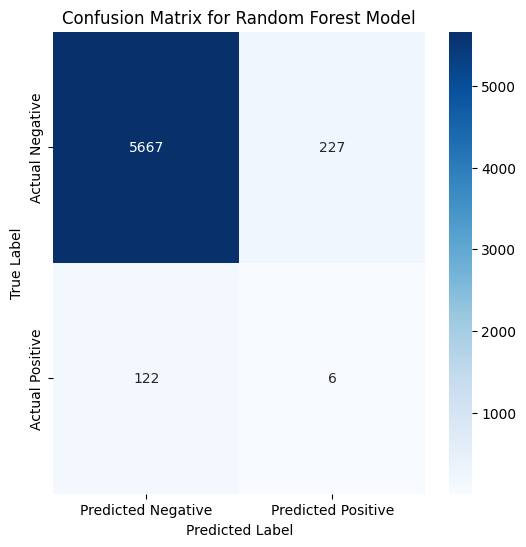

Random Forest Accuracy: 0.94
Random Forest Precision: 0.03
Random Forest Recall: 0.05
Random Forest F1 Score: 0.03
Random Forest Sensitivity: 0.05
Random Forest Specificity: 0.96
Random Forest AUC: 0.72


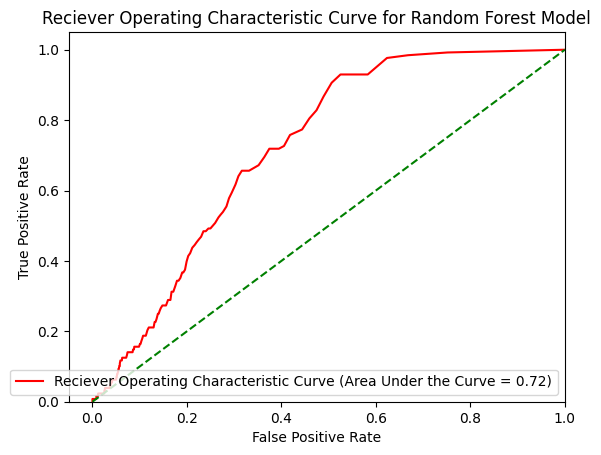

In [ ]:
# Build and evaluate a Random Forest model, with a confusion matrix plot


# Define sensitivity/specificity function
def calc_sens_spec(y_true, y_pred):
    cnf_mtrx_for_models = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cnf_mtrx_for_models.ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    return sensitivity, specificity

# Create and train a Random Forest model
rf_classifier_initialization_using_best_parameters = RandomForestClassifier(random_state=42,max_depth= None, min_samples_leaf= 1, min_samples_split=2, n_estimators= 300)
rf_classifier_initialization_using_best_parameters.fit(X_train_resampled, y_train_resampled)

y_prediction_on_test_set_after_tuning = rf_classifier_initialization_using_best_parameters.predict(X_test)
prediction_probability_after_tuning = rf_classifier_initialization_using_best_parameters.predict_proba(X_test)

print("After Hypertuning RF report:")
print(classification_report(y_test, y_prediction_on_test_set_after_tuning))

print("Confusion Matrix for Random Forest (actual vs predicted):")
print(confusion_matrix(y_test, y_prediction_on_test_set_after_tuning))

# Show the confusion matrix as a heatmap
cnf_mtrx_for_models = confusion_matrix(y_test, y_prediction_on_test_set_after_tuning)
plt.figure(figsize=(6, 6))
sns.heatmap(cnf_mtrx_for_models, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix for Random Forest Model')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Calculate accuracy
score_of_accuracy_after_tuning = accuracy_score(y_test, y_prediction_on_test_set_after_tuning)
print(f"Random Forest Accuracy: {score_of_accuracy_after_tuning:.2f}")

# Get precision, recall, and F1 score
precision_values_after_tuning = precision_score(y_test, y_prediction_on_test_set_after_tuning)
recall_values_after_tuning = recall_score(y_test, y_prediction_on_test_set_after_tuning)
f1_values_after_applying_best_paramters = f1_score(y_test, y_prediction_on_test_set_after_tuning)
print(f"Random Forest Precision: {precision_values_after_tuning:.2f}")
print(f"Random Forest Recall: {recall_values_after_tuning:.2f}")
print(f"Random Forest F1 Score: {f1_values_after_applying_best_paramters:.2f}")

# Calculate sensitivity, specificity, and AUC
sensitivity_rf, specificity_rf = calc_sens_spec(y_test, y_prediction_on_test_set_after_tuning)
false_pos, true_pos, _ = roc_curve(y_test, prediction_probability_after_tuning[:, 1])
area_under_curve_for_rf_classifier_after_tuning = roc_auc_score(y_test, prediction_probability_after_tuning[:, 1])
print(f"Random Forest Sensitivity: {sensitivity_rf:.2f}")
print(f"Random Forest Specificity: {specificity_rf:.2f}")
print(f"Random Forest AUC: {area_under_curve_for_rf_classifier_after_tuning:.2f}")

# Plot the ROC curve to see how well it separates classes
plt.figure()
plt.plot(false_pos, true_pos, color='red', label=f'Reciever Operating Characteristic Curve (Area Under the Curve = {area_under_curve_for_rf_classifier_after_tuning:.2f})')
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Reciever Operating Characteristic Curve for Random Forest Model')
plt.legend(loc="lower right")
plt.show()

##Hypertuned XGBoost Model

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:33:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


After Hyperparameter tuning xgb report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      5894
           1       0.01      0.02      0.01       128

    accuracy                           0.95      6022
   macro avg       0.50      0.49      0.50      6022
weighted avg       0.96      0.95      0.96      6022

Confusion Matrix for XGBoost (actual vs predicted):
[[5741  153]
 [ 126    2]]


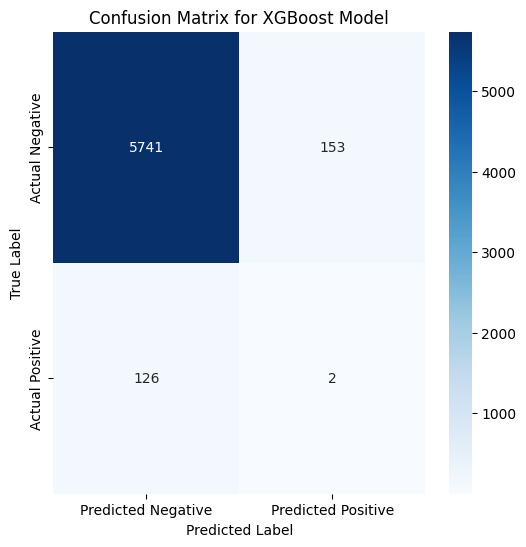

XGBoost Accuracy: 0.95
XGBoost Precision: 0.01
XGBoost Recall: 0.02
XGBoost F1 Score: 0.01
XGBoost Sensitivity: 0.02
XGBoost Specificity: 0.97
XGBoost AUC: 0.70


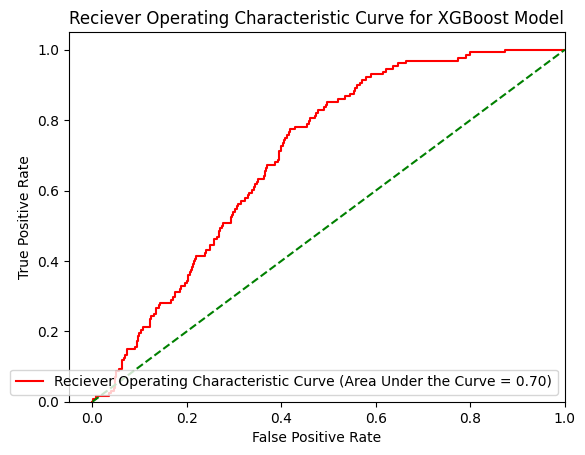

In [ ]:


# Create and train an XGBoost model
initialize_xgb_classifier_using_best_parameters_after_tuning = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss',learning_rate= 0.3, max_depth= 9, n_estimators= 300, subsample= 0.8) # add hypertuned parameters: learning_rate= 0.3, max_depth= 9, n_estimators= 300, subsample= 0.8 for better accuracy
initialize_xgb_classifier_using_best_parameters_after_tuning.fit(X_train_resampled, y_train_resampled)  # Use resampled training data

# Make predictions on the original test set
y_prediction_values_after_tuning = initialize_xgb_classifier_using_best_parameters_after_tuning.predict(X_test)  # Predicted labels
prediction_probability_after_tuning = initialize_xgb_classifier_using_best_parameters_after_tuning.predict_proba(X_test)  # Probabilities for ROC/AUC

# Check how well the model did
print("After Hyperparameter tuning xgb report:")
print(classification_report(y_test, y_prediction_values_after_tuning))

# Look at the confusion matrix (numerical version)
print("Confusion Matrix for XGBoost (actual vs predicted):")
print(confusion_matrix(y_test, y_prediction_values_after_tuning))

# Show the confusion matrix as a heatmap
cnf_mtrx_for_models = confusion_matrix(y_test, y_prediction_values_after_tuning)
plt.figure(figsize=(6, 6))
sns.heatmap(cnf_mtrx_for_models, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix for XGBoost Model')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Calculate accuracy
accuracy_score_for_sgb_classifier_after_tuning = accuracy_score(y_test, y_prediction_values_after_tuning)
print(f"XGBoost Accuracy: {accuracy_score_for_sgb_classifier_after_tuning:.2f}")

# Get precision, recall, and F1 score
precision_values_for_xgb_after_applying_tuning_parameters = precision_score(y_test, y_prediction_values_after_tuning)  # How many predicted positives were correct?
recall_values_after_applying_tuning_parameters = recall_score(y_test, y_prediction_values_after_tuning)        # How many actual positives did we find?
f1_values_after_applying_tuned_parameters = f1_score(y_test, y_prediction_values_after_tuning)                # A balance between precision and recall
print(f"XGBoost Precision: {precision_values_for_xgb_after_applying_tuning_parameters:.2f}")
print(f"XGBoost Recall: {recall_values_after_applying_tuning_parameters:.2f}")
print(f"XGBoost F1 Score: {f1_values_after_applying_tuned_parameters:.2f}")

# Calculate sensitivity, specificity, and AUC
sensitivity_xgb, specificity_xgb = calc_sens_spec(y_test, y_prediction_values_after_tuning)
false_pos, true_pos, _ = roc_curve(y_test, prediction_probability_after_tuning[:, 1])
area_under_the_curve_for_xgb_after_using_tuned_parameters = roc_auc_score(y_test, prediction_probability_after_tuning[:, 1])
print(f"XGBoost Sensitivity: {sensitivity_xgb:.2f}")
print(f"XGBoost Specificity: {specificity_xgb:.2f}")
print(f"XGBoost AUC: {area_under_the_curve_for_xgb_after_using_tuned_parameters:.2f}")

# Plot the ROC curve to see how well it separates classes
plt.figure()
plt.plot(false_pos, true_pos, color='red', label=f'Reciever Operating Characteristic Curve (Area Under the Curve = {area_under_the_curve_for_xgb_after_using_tuned_parameters:.2f})')
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Reciever Operating Characteristic Curve for XGBoost Model')
plt.legend(loc="lower right")
plt.show()

## Performance Benchmark Across Hypertuned Model

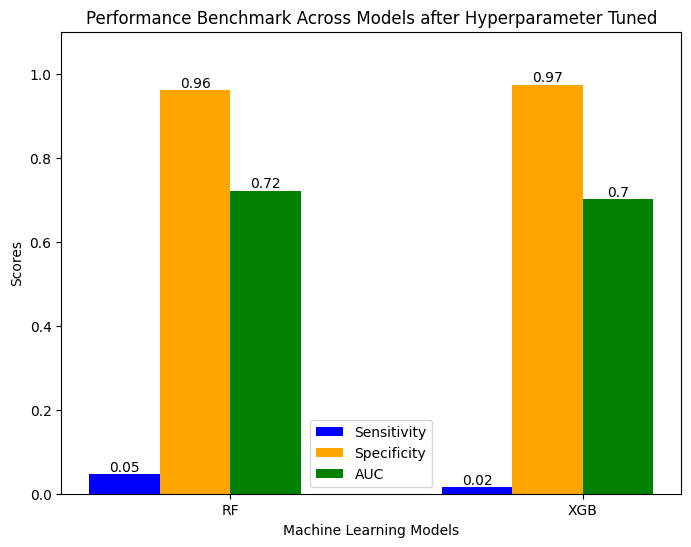

In [ ]:
# Performance Benchmark Across Models

# Use actual values from #6 and #7
ml_names = ['RF', 'XGB']
sensitivities = [sensitivity_rf, sensitivity_xgb]  # From #6 and #7
specificities = [specificity_rf, specificity_xgb]  # From #6 and #7
aucs = [area_under_curve_for_rf_classifier_after_tuning, area_under_the_curve_for_xgb_after_using_tuned_parameters]                           # From #6 and #7

# Define the autolabel function to show the height (score) above each bar
def autolabel(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2.0, yval, round(yval, 2),
                 ha='center', va='bottom')

# Plot sensitivity, specificity, and AUC
fig, ax = plt.subplots(figsize=(8, 6))
bar_width = 0.2
index = np.arange(len(ml_names))

# Create bars
bar1 = ax.bar(index, sensitivities, bar_width, label='Sensitivity', color='blue')
bar2 = ax.bar(index + bar_width, specificities, bar_width, label='Specificity', color='orange')
bar3 = ax.bar(index + 2 * bar_width, aucs, bar_width, label='AUC', color='green')

# Customize the plot
ax.set_xlabel('Machine Learning Models')
ax.set_ylabel('Scores')
ax.set_title('Performance Benchmark Across Models after Hyperparameter Tuned')
ax.set_xticks(index + bar_width * 1.5)  # Center x-ticks properly
ax.set_xticklabels(ml_names)
ax.set_ylim(0, 1.1)  # Ensure space for labels above bars
ax.legend()

# Add labels above the bars
autolabel(bar1)
autolabel(bar2)
autolabel(bar3)

plt.show()